<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating Classification Models on Humor Styles Data

_Authors: Kiefer Katovich (SF)_

---

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Humor Styles" survey.

This survey is designed to evaluate what "style" of humor subjects have. Your goal will be to classify gender using the responses on the survey.

## Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

    1. I usually don't laugh or joke with other people.
    2. If I feel depressed, I can cheer myself up with humor.
    3. If someone makes a mistake, I will tease them about it.
    4. I let people laugh at me or make fun of me at my expense more than I should.
    5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
    6. Even when I'm alone, I am often amused by the absurdities of life.
    7. People are never offended or hurt by my sense of humor.
    8. I will often get carried away in putting myself down if it makes family or friends laugh.
    9. I rarely make other people laugh by telling funny stories about myself.
    10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
    11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
    12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
    13. I laugh and joke a lot with my closest friends.
    14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
    15. I do not like it when people use humor as a way of criticizing or putting someone down.
    16. I don't often say funny things to put myself down.
    17. I usually don't like to tell jokes or amuse people.
    18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
    19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
    20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
    21. I enjoy making people laugh.
    22. If I am feeling sad or upset, I usually lose my sense of humor.
    23. I never participate in laughing at others even if all my friends are doing it.
    24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
    25. I donít often joke around with my friends.
    26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
    27. If I don't like someone, I often use humor or teasing to put them down.
    28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
    29. I usually can't think of witty things to say when I'm with other people.
    30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
    31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
    32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 1. Load the data and perform any EDA and cleaning you think is necessary.

It is worth reading over the description of the data columns above for this.

In [2]:
hsq = pd.read_csv('./datasets/hsq_data.csv')

In [3]:
# A:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [4]:
hsq.isnull().sum()[hsq.isnull().sum()]
# There are no null values

Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
Q1    0
dtype: int64

In [5]:
hsq.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2.025210,3.342670,3.078431,2.833800,3.599440,4.152194,3.277311,2.535014,2.582633,2.869281,...,3.945845,2.767507,2.838469,4.010644,3.375537,2.956583,2.762745,70.966387,1.455649,87.542484
std,1.075782,1.112898,1.167877,1.160252,1.061281,0.979315,1.099974,1.231380,1.224530,1.205013,...,1.135189,1.309601,1.233889,0.708479,0.661533,0.410870,0.645982,1371.989249,0.522076,12.038483
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.300000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,2.900000,2.800000,2.300000,18.500000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.400000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,44849.000000,3.000000,100.000000


In [6]:
hsq.rename(columns={'selfenhancing': 'self_enhancing', 'agressive': 'aggressive', 'selfdefeating': 'self_defeating'}, inplace=True)

In [7]:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,self_enhancing,aggressive,self_defeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [8]:
hsq.loc[:, 'affiliative':].head()

,affiliative,self_enhancing,aggressive,self_defeating,age,gender,accuracy
0,4.0,3.5,3.0,2.3,25,2,100
1,3.3,3.5,3.3,2.4,44,2,90
2,3.9,3.9,3.1,2.3,50,1,75
3,3.6,4.0,2.9,3.3,30,2,85
4,4.1,4.1,2.9,2.0,52,1,80


In [9]:
hsq['gender'].unique()

array([2, 1, 3, 0], dtype=int64)

In [10]:
hsq['gender'].value_counts()

1    581
2    477
3      8
0      5
Name: gender, dtype: int64

In [11]:
hsq = hsq.loc[hsq['gender'].isin([1,2])] # filter gender column so only 1 and 2 values are contained

In [12]:
hsq['gender'].value_counts() # now only displays 1 & 2 values

1    581
2    477
Name: gender, dtype: int64

In [13]:
hsq = hsq.loc[hsq['age'] < 115]

In [14]:
hsq.shape

(1055, 39)

In [15]:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,self_enhancing,aggressive,self_defeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


### 2. Set up a predictor matrix to predict `gender` (only male vs. female)

Choice of predictors is up to you. Justify which variables you include.

In [58]:
# A:
X = [x for x in hsq.columns if 'Q' in x]
X = X + ['age', 'accuracy']
X = hsq[X]

In [60]:
y = hsq['gender'].map(lambda x: 1 if x == 1 else 0)
y

0       0
1       0
2       1
3       0
4       1
5       0
6       1
7       1
8       0
9       1
10      1
11      1
12      0
13      1
14      1
15      1
16      0
17      0
18      1
19      1
20      1
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      0
       ..
1041    0
1042    1
1043    0
1044    0
1045    1
1046    0
1047    1
1048    1
1049    1
1050    0
1051    0
1052    1
1053    1
1054    0
1055    1
1056    0
1057    1
1058    1
1059    0
1060    1
1061    1
1062    0
1063    0
1064    1
1065    1
1066    0
1067    1
1068    1
1069    0
1070    0
Name: gender, Length: 1055, dtype: int64

In [18]:
Xdf = pd.DataFrame(X)
Xdf.head()
hsq_corr = Xdf.corr()

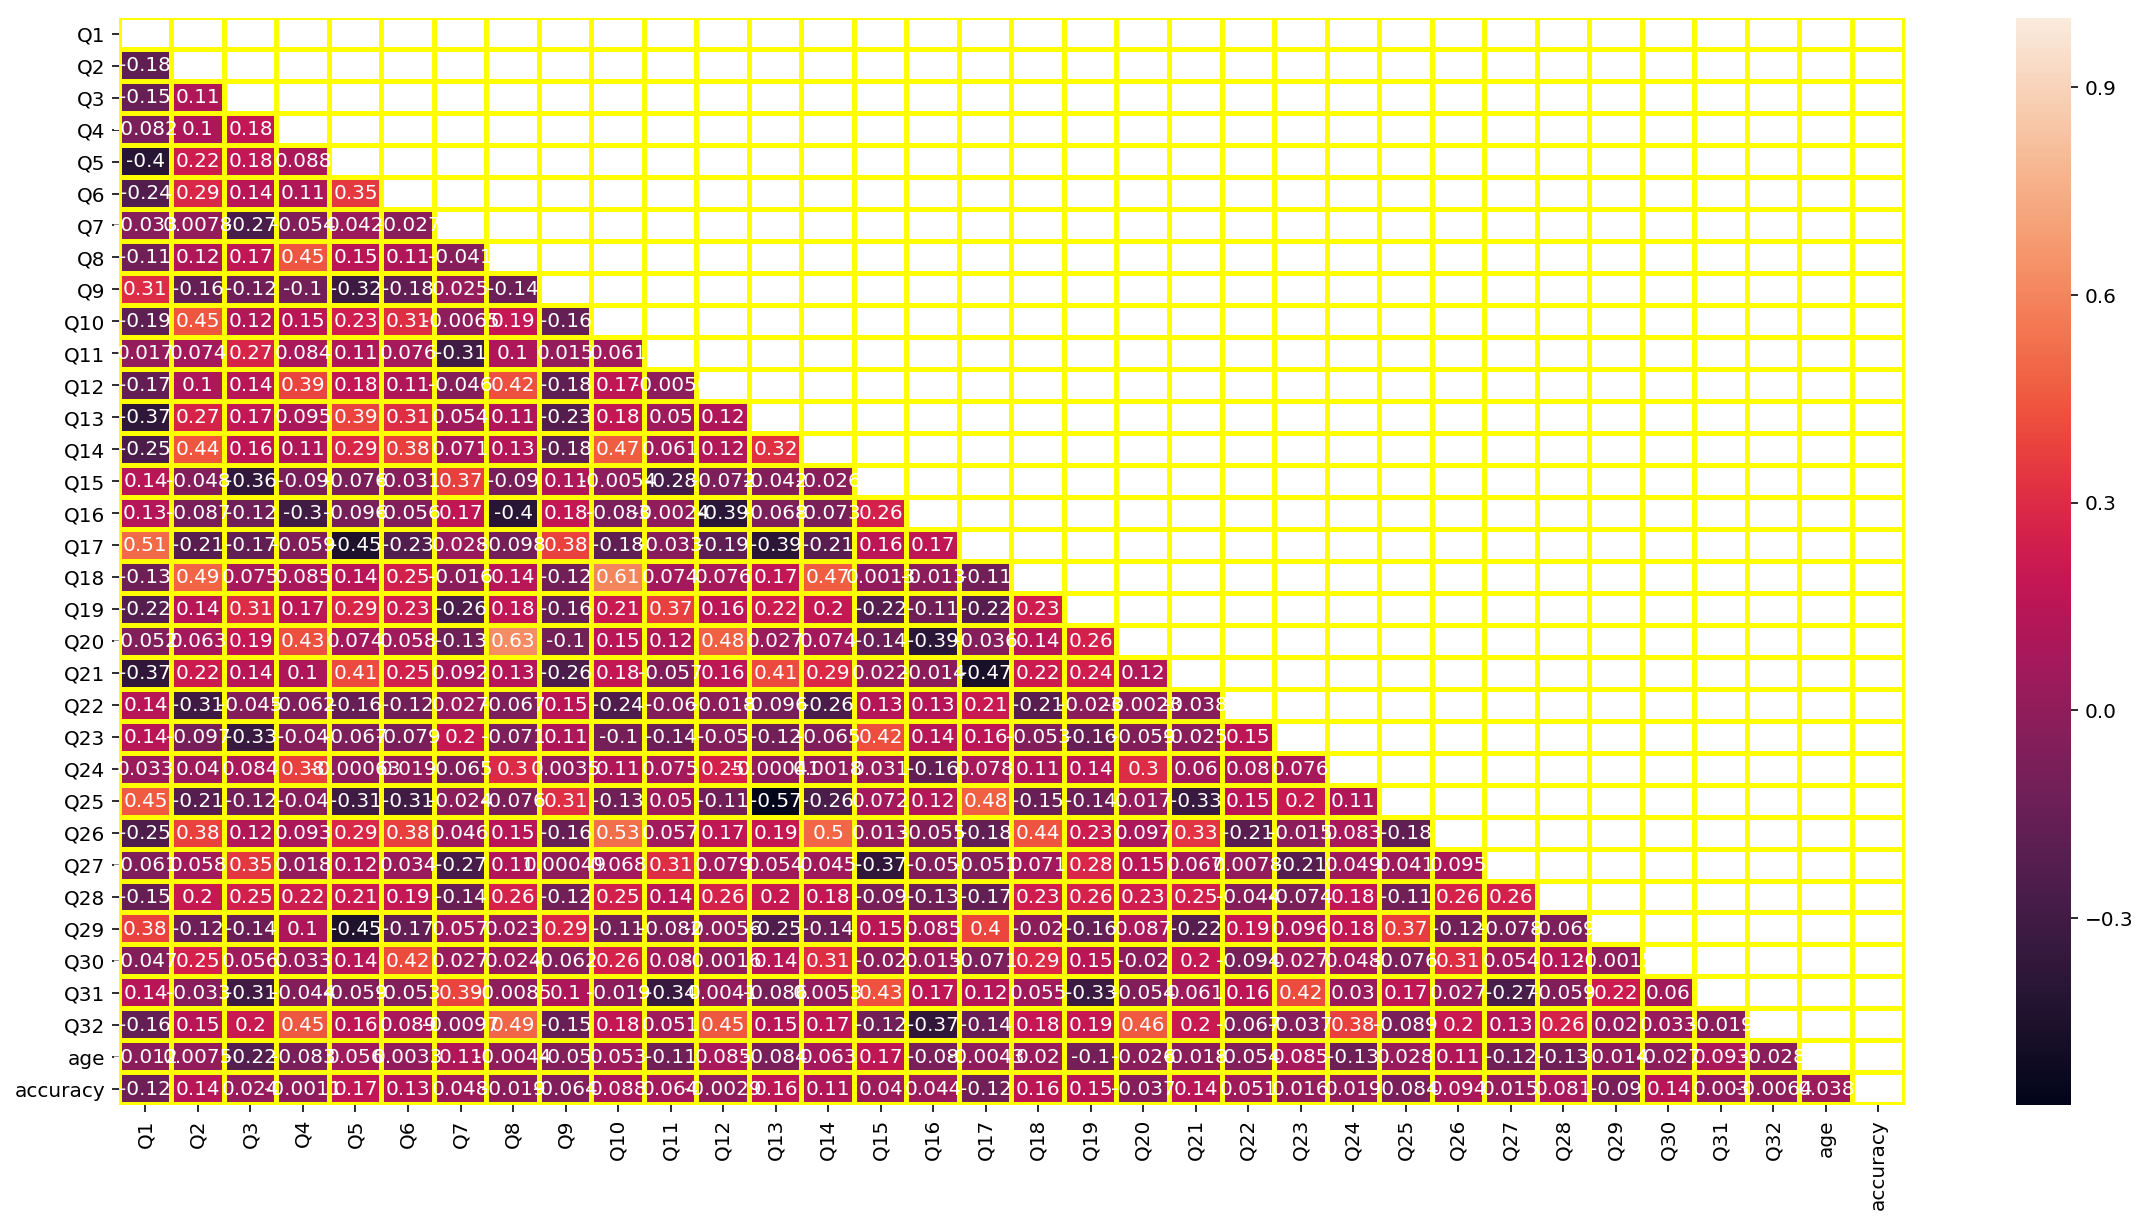

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

mask = np.zeros_like(hsq_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(hsq_corr, ax=ax, mask=mask, annot=True, linewidths=2, linecolor='yellow')

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [21]:
Xs

array([[-0.02553878, -1.20256868, -0.06835746, ..., -0.68476532,
        -0.12131251,  1.03615694],
       [-0.02553878, -0.30213578, -0.92689462, ..., -1.49648151,
         1.59236559,  0.20707422],
       [ 0.90354437,  0.59829712, -0.06835746, ..., -0.68476532,
         2.13352709, -1.03654987],
       ..., 
       [-0.95462193,  0.59829712,  0.7901797 , ...,  1.75038326,
        -1.02324835,  0.62161558],
       [ 0.90354437,  0.59829712,  0.7901797 , ...,  0.12695087,
        -0.48208684, -0.0416506 ],
       [ 1.83262753, -1.20256868, -1.78543178, ..., -1.49648151,
         0.32965541, -1.03654987]])

### 3. Fit a Logistic Regression model and compare your cross-validated accuracy to the baseline.

In [22]:
# A:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [43]:
print(np.mean(y)) # baseline accuracy

0.5488151658767773


In [53]:
lg = LogisticRegression()
lg_fit = lg.fit(Xs, y)
y_pred = lg.predict(Xs)
print(y[0:10])
y_pred[:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    1
8    0
9    1
Name: gender, dtype: int64


array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [45]:
lg.score(Xs, y)

0.63222748815165875

In [54]:
score = cross_val_score(lg, Xs, y, cv=25)
print(score)
print(np.mean(score)) # 60% is higher than 54% accuracy so better than baseline

[ 0.61363636  0.58139535  0.65116279  0.65116279  0.73809524  0.5952381
  0.61904762  0.61904762  0.42857143  0.5952381   0.52380952  0.64285714
  0.42857143  0.57142857  0.69047619  0.5952381   0.66666667  0.61904762
  0.61904762  0.66666667  0.57142857  0.69047619  0.5952381   0.5
  0.54761905]
0.600846672707


### 4. Create a 50-50 train-test split. Fit the model on training and get the predictions and predicted probabilities on the test data.

In [55]:
# A:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.5)
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
yhat = lg.predict(X_test)
yhat_pp = lg.predict_proba(X_test)
print(yhat)
print(yhat_pp)

[1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 1 

In [67]:
y_test_predict = lg.predict(X_test)

In [68]:
y_test_predict[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [69]:
y_test[0:10]

566    1
639    1
126    0
777    0
5      0
359    1
603    0
402    1
487    0
893    0
Name: gender, dtype: int64

### 5. Manually calculate the true positives, false positives, true negatives, and false negatives.

In [65]:
# A:
tp = np.sum((y_test == 1) & (yhat == 1))
fp = np.sum((y_test == 0) & (yhat == 1))
tn = np.sum((y_test == 0) & (yhat == 0))
fn = np.sum((y_test == 1) & (yhat == 0))
print('tp:', tp)
print('fp:', fp)
print('tn:', tn)
print('fn:', fn)

tp: 216
fp: 159
tn: 90
fn: 63


### 6. Construct the confusion matrix. 

In [74]:
# A:

conf = np.array(confusion_matrix(y_test, yhat, labels=[1,0]))
confusion = pd.DataFrame(conf, index=['is_male', 'is_female'], columns=['predicted_male', 'predicted_female'])

In [75]:
confusion

,predicted_male,predicted_female
is_male,216,63
is_female,159,90


### 7. Print out the false positive count as you change your threshold for predicting label 1.

In [88]:
yhat_pp

array([[ 0.43970871,  0.56029129],
       [ 0.14968869,  0.85031131],
       [ 0.24439013,  0.75560987],
       ..., 
       [ 0.3051083 ,  0.6948917 ],
       [ 0.16934609,  0.83065391],
       [ 0.8493217 ,  0.1506783 ]])

In [89]:
y_pp = pd.DataFrame(yhat_pp, columns=['female', 'male'])

In [90]:
y_pp.head()

,female,male
0,0.439709,0.560291
1,0.149689,0.850311
2,0.244390,0.755610
3,0.333410,0.666590
4,0.486064,0.513936


In [91]:
y_pp['pred_class for label 1'] = [1 if x >= 0.10 else 0 for x in y_pp['male'].values]

In [95]:
y_pp.head()

,female,male,pred_class for label 1
0,0.439709,0.560291,1
1,0.149689,0.850311,1
2,0.244390,0.755610,1
3,0.333410,0.666590,1
4,0.486064,0.513936,1


In [98]:
cmat = confusion_matrix(y_test, y_pp['pred_class for label 1'])
cmat

array([[  0, 249],
       [  0, 279]], dtype=int64)

In [104]:
accuracy_score(y_test, y_pp['pred_class for label 1'])

0.52840909090909094

### 8. Plot an ROC curve using your predicted probabilities on the test data.

Calculate the area under the curve.

> *Hint: go back to the lecture to find code for plotting the ROC curve.*

In [107]:
yhat_pp

array([[ 0.43970871,  0.56029129],
       [ 0.14968869,  0.85031131],
       [ 0.24439013,  0.75560987],
       ..., 
       [ 0.3051083 ,  0.6948917 ],
       [ 0.16934609,  0.83065391],
       [ 0.8493217 ,  0.1506783 ]])

In [28]:
from sklearn.metrics import roc_curve, auc

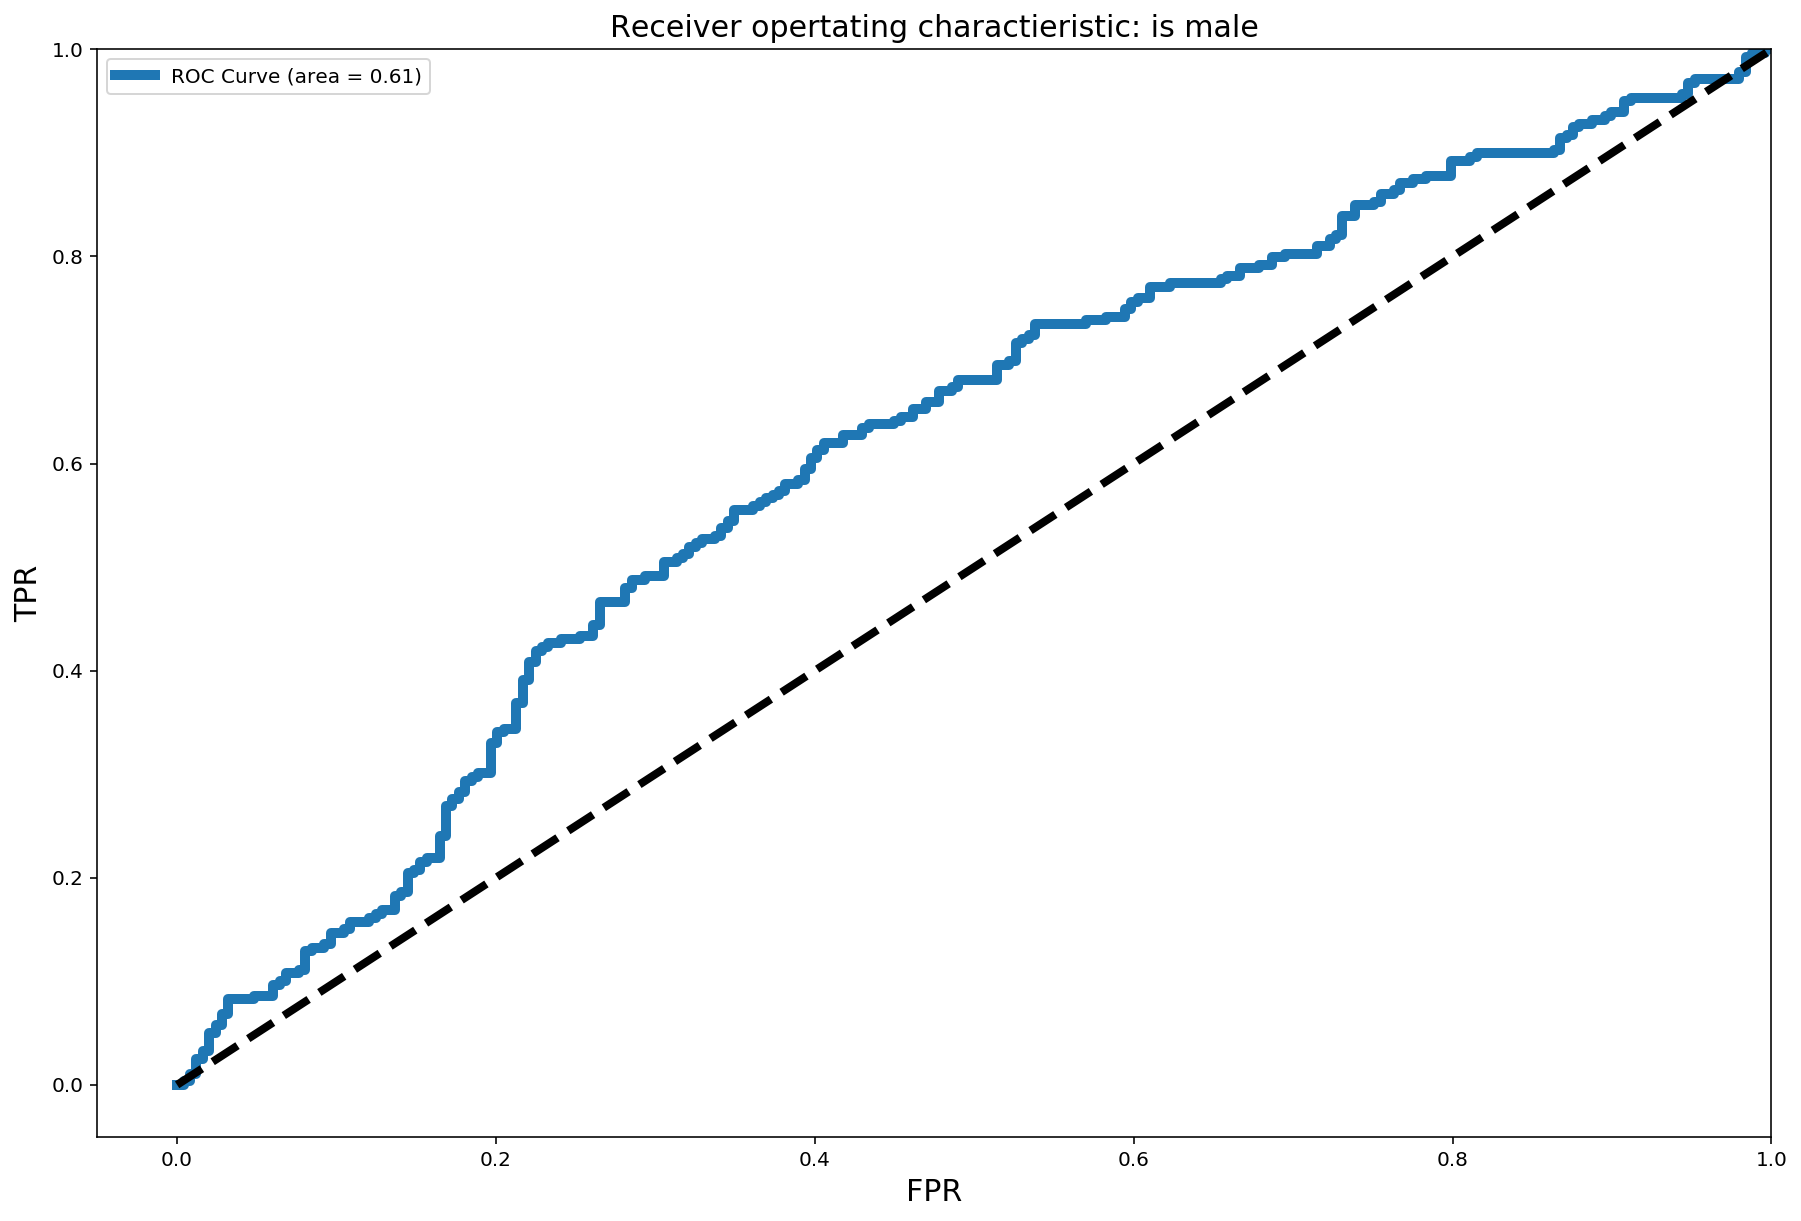

In [112]:
fpr , tpr, thresh = roc_curve(y_test, y_pp['male'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc, linewidth=5)
plt.plot([0,1], [0,1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.0])
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.title('Receiver opertating charactieristic: is male', fontsize=15)
plt.legend(loc='upper left')
plt.show()

### 9. Cross-validate a logistic regression with a Ridge penalty.

Logistic regression can also use the Ridge penalty. Sklearn's `LogisticRegressionCV` class will help you cross-validate an appropriate regularization strength.

**Important `LogisticRegressionCV` arguments:**
- `penalty`: this can be one of `'l1'` or `'l2'`. L1 is the Lasso, and L2 is the Ridge.
- `Cs`: How many different (automatically-selected) regularization strengths should be tested.
- `cv`: How many cross-validation folds should be used to test regularization strength.
- `solver`: When using the lasso penalty, this should be set to `'liblinear'`

> **Note:** The `C` regularization strength is the *inverse* of alpha. That is to say, `C = 1./alpha`

In [115]:
from sklearn.linear_model import LogisticRegressionCV

lcv = LogisticRegressionCV(penalty='l2', Cs=200, cv=25)
lcv_fit = lcv.fit(X_train, y_train)

In [116]:
lcv_rp = lcv_fit.predict(X_test)

In [117]:
lcv_rp_proba = lcv_fit.predict_proba(X_test)

In [119]:
print(lcv.C_)

[ 0.00337006]


In [118]:
print(lcv_rp)
print(lcv_rp_proba)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 

**9.B Calculate the predicted labels and predicted probabilities on the test set with the Ridge logisitic regression.**

In [32]:
lcv.predict

**9.C Construct the confusion matrix for the Ridge LR.**

In [123]:
# A:
conmat = confusion_matrix(y_test, lcv_rp, labels=[1,0])
conmat

array([[259,  20],
       [212,  37]], dtype=int64)

In [124]:
accuracy_score(y_test, lcv_rp)

0.56060606060606055

### 10. Plot the ROC curve for the original and Ridge logistic regressions on the same plot.

Which performs better?

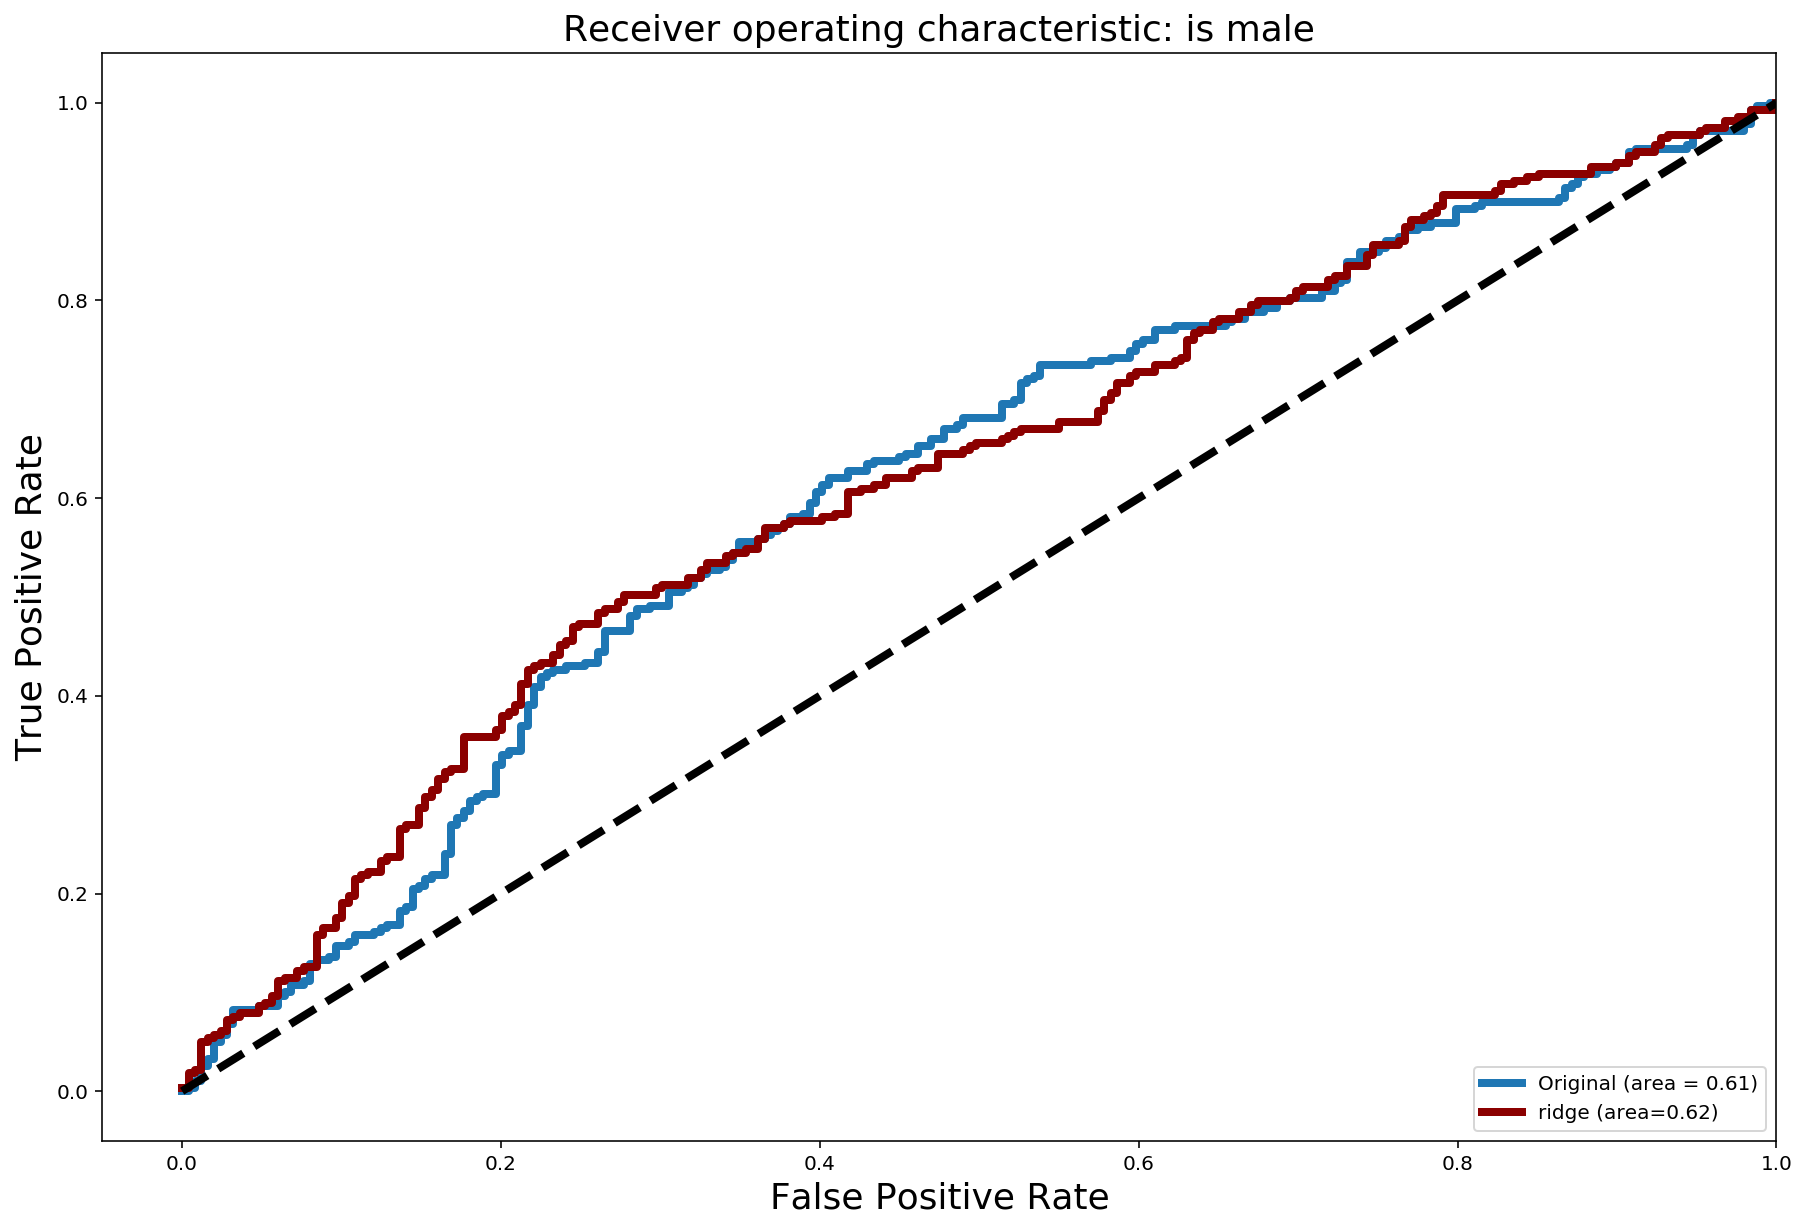

In [126]:
fpr_ridge, tpr_ridge, thresh = roc_curve(y_test, lcv_rp_proba[:,1])
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr, label='Original (area = %0.2f)' % roc_auc,linewidth=4)
plt.plot(fpr_ridge, tpr_ridge, label='ridge (area=%.2f)' % roc_auc_ridge, linewidth=4, color='darkred')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is male', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [34]:
# A:

### 11. Cross-validate a Lasso logistic regression.

**Remember:**
- `penalty` must be set to `'l1'`
- `solver` must be set to `'liblinear'`

> **Note:** The lasso penalty can be considerably slower. You may want to try fewer Cs or use fewer cv folds.

In [128]:
# A:

lgc = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100, cv=10)
lgc.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [129]:
ytest_lasso_predict = lgc.predict(X_test)
ytest_lasso_proba = lgc.predict_proba(X_test)

In [130]:
print(ytest_lasso_predict)
print(ytest_lasso_proba)

[1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 0 

### 12. Make the confusion matrix for the Lasso model.

In [131]:
confusion_matrix(y_test, ytest_lasso_predict, labels=[1,0])

array([[203,  76],
       [145, 104]], dtype=int64)

In [132]:
accuracy_score(y_test, ytest_lasso_predict)

0.58143939393939392

### 13. Plot all three logistic regression models on the same ROC plot.

Which is the best? (if any)

In [134]:
# A:
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, ytest_lasso_proba[:,1])
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

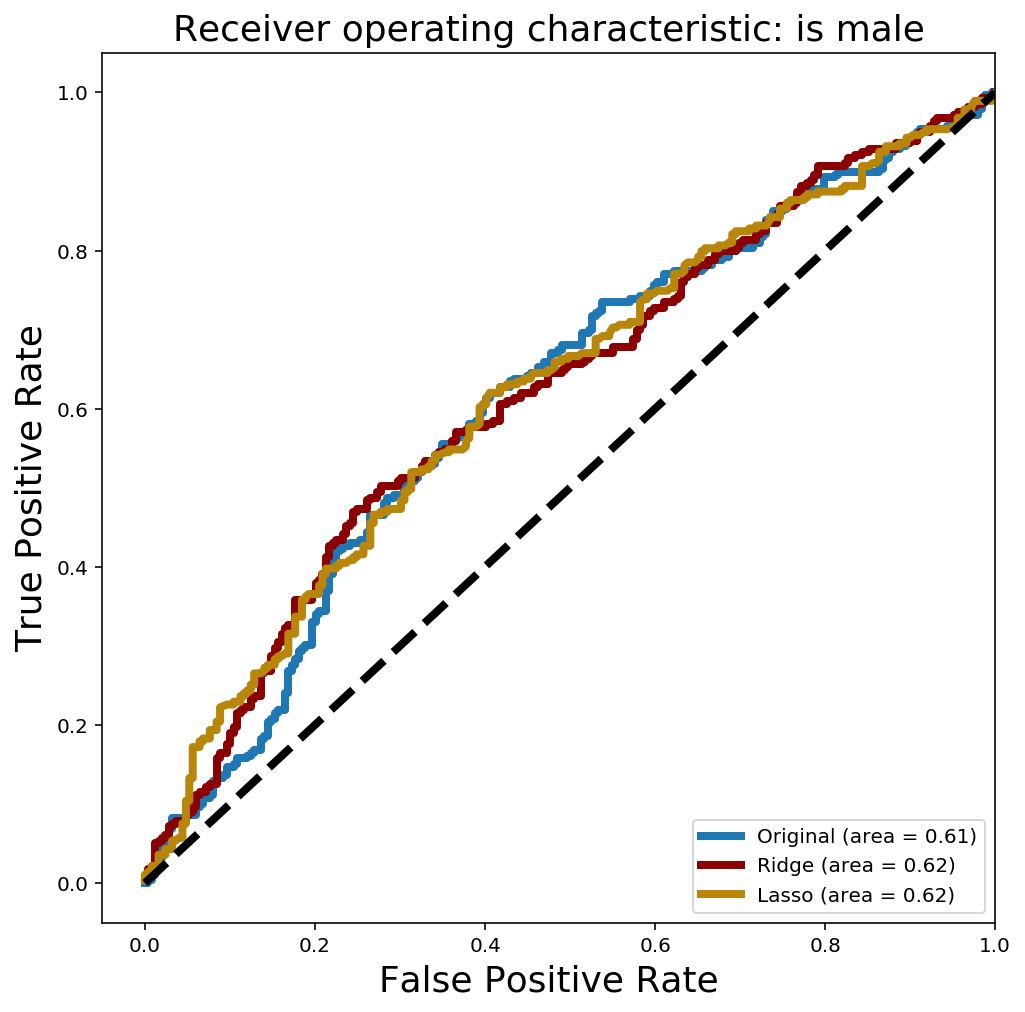

In [136]:
plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='Original (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fpr_ridge, tpr_ridge, label='Ridge (area = %0.2f)' % roc_auc_ridge, 
         linewidth=4, color='darkred')
plt.plot(fpr_lasso, tpr_lasso, label='Lasso (area = %0.2f)' % roc_auc_lasso, 
         linewidth=4, color='darkgoldenrod')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is male', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 14. Look at the coefficients for the Lasso logistic regression model. Which variables are the most important?

In [138]:
# A:

lgc.coef_

array([[ 0.00510758,  0.        ,  0.        ,  0.04012078,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.29876408,
         0.        ,  0.        , -0.01732986,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00560772,
        -0.04356982,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [139]:
coefs = pd.DataFrame({'Coef': lgc.coef_[0],
                     'abs coef': np.abs(lgc.coef_[0]),
                     'X': X.columns})

In [141]:
coefs.head()

,Coef,X,abs coef
0,0.005108,Q1,0.005108
1,0.000000,Q2,0.000000
2,0.000000,Q3,0.000000
3,0.040121,Q4,0.040121
4,0.000000,Q5,0.000000


In [144]:
coefs.sort_values(by='abs coef', ascending=True)

,Coef,X,abs coef
16,0.000000,Q17,0.000000
31,0.000000,Q32,0.000000
30,0.000000,Q31,0.000000
29,0.000000,Q30,0.000000
28,0.000000,Q29,0.000000
27,0.000000,Q28,0.000000
26,0.000000,Q27,0.000000
23,0.000000,Q24,0.000000
22,0.000000,Q23,0.000000
21,0.000000,Q22,0.000000
